In [1]:
import numpy as np
import os
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Advertising.csv')

We will build a couple of models and observe the behaviour of RSS.
Let's define a few models:
1. Model_1=$Sales=\beta_0+\beta_1TV$
2. Model_2=$Sales=\beta_0+\beta_1Radio$
3. Model_3=$Sales=\beta_0+\beta_1Newspaper$
4. Model_4=$Sales=\beta_0+\beta_1TV+\beta_2Radio$
5. Model_5=$Sales=\beta_0+\beta_1TV+\beta_2Newspaper$
6. Model_6=$Sales=\beta_0+\beta_1Radio+\beta_2Newspaper$
7. Model_7=$Sales=\beta_0+\beta_1TV+\beta_2Radio+\beta_3Newspaper$

In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [6]:
X=data[['TV','Radio','Newspaper']]
Y=data['Sales']

In [7]:
#X['Ones']=np.repeat(1,X.shape[0])
X=X[['TV','Radio','Newspaper']]

In [8]:
import sklearn.linear_model as linear_model

In [9]:
reg=linear_model.LinearRegression()

In [10]:
Model_1=linear_model.LinearRegression(fit_intercept=True)
Model_2=linear_model.LinearRegression(fit_intercept=True)
Model_3=linear_model.LinearRegression(fit_intercept=True)
Model_4=linear_model.LinearRegression(fit_intercept=True)
Model_5=linear_model.LinearRegression(fit_intercept=True)
Model_6=linear_model.LinearRegression(fit_intercept=True)
Model_7=linear_model.LinearRegression(fit_intercept=True)
Model_1=Model_1.fit(X[['TV']],Y)
Model_2=Model_2.fit(X[['Radio']],Y)
Model_3=Model_3.fit(X[['Newspaper']],Y)
Model_4=Model_4.fit(X[['TV','Radio']],Y)
Model_5=Model_5.fit(X[['TV','Newspaper']],Y)
Model_6=Model_6.fit(X[['Radio','Newspaper']],Y)
Model_7=Model_7.fit(X,Y)

In [11]:
loss=[]

In [12]:
loss.append(np.sum((Y-Model_3.predict(X[['Newspaper']]))**2))

In [13]:
loss.append(np.sum((Y-Model_4.predict(X[['TV','Radio']]))**2))

In [14]:
loss.append(np.sum((Y-Model_7.predict(X))**2))

In [15]:
loss=Series(loss,index=['One Variable','Two Variables','Three Variables'])

In [16]:
print(loss)

One Variable       5134.804544
Two Variables       556.913980
Three Variables     556.825263
dtype: float64


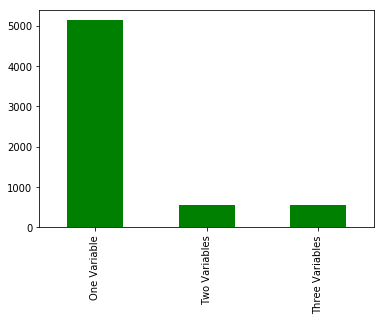

In [17]:
loss.plot.bar(color='green')

#### So, as you can see as I increase the number of predictors in my data, my RSS seems to be decreasing as is evidenced by this graph here.